In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from statannot import add_stat_annotation
from scipy.stats import wilcoxon, mannwhitneyu

In [2]:
cutoff = 2
file = 'task2.txt'
data = pd.read_csv(file, sep='\t', index_col=0, encoding= 'unicode_escape')
df = pd.DataFrame(data)

df

,Eosinophil,Erythrocyte,Macs_M0,Macs_M1,Macs_M2,Megakaryocyte,Mono,NK,Naive CD4,Naive CD8,...,CD4 central memory,CD8 central memory,CD8 effector,CD4 effector memory,CD8 effector memory,iDC,Memory B cell,mDC,Naive B cell,Toxicity
Mixture,,,,,,,,,,,,,,,,,,,,,
tot-YUPRAF_19-3925-cfDNA,0.074498,0.066531,0.036577,0.044414,0.032557,0.078836,0.056628,0.041966,0.022621,0.020296,...,0.028840,0.023787,0.031863,0.024324,0.031087,0.042787,0.020717,0.041132,0.032623,1
tot-YUTAUR_19-3926-cfDNA,0.047686,0.074109,0.032133,0.028729,0.028973,0.091935,0.042271,0.038487,0.027399,0.012229,...,0.020663,0.015800,0.032141,0.010035,0.026756,0.033291,0.045697,0.019908,0.031558,3
tot-YUTHEA_20-4000-cfDNA,0.055521,0.115136,0.035011,0.039618,0.031698,0.139834,0.034440,0.035204,0.020802,0.015957,...,0.015984,0.033990,0.021989,0.021578,0.011892,0.033884,0.018097,0.032866,0.026335,1
Y-3674-cfDNA,0.046662,0.066936,0.032497,0.023546,0.025673,0.103018,0.022150,0.038874,0.018915,0.007695,...,0.003484,0.012188,0.010764,0.012681,0.001037,0.033458,0.027654,0.009474,0.037750,0
Y-3688-cfDNA,0.042208,0.114403,0.051025,0.064132,0.040406,0.100405,0.032233,0.038541,0.029188,0.015507,...,0.018895,0.028700,0.036783,0.023186,0.017554,0.041576,0.020804,0.033063,0.028505,3
Y-3703-cfDNA,0.055774,0.107653,0.035101,0.019269,0.037810,0.149276,0.048074,0.049030,0.029233,0.015715,...,0.019675,0.025123,0.048082,0.049712,0.009202,0.025938,0.019597,0.031700,0.000000,3
Y-3707-cfDNA,0.038123,0.123476,0.027200,0.033429,0.039456,0.198160,0.030715,0.049326,0.032789,0.042704,...,0.017536,0.032336,0.024978,0.034625,0.000000,0.039218,0.010437,0.014048,0.004404,0
Y-3715-cfDNA,0.042338,0.075726,0.031934,0.046949,0.031801,0.073712,0.047820,0.039112,0.021753,0.026649,...,0.030448,0.022761,0.036169,0.005018,0.011383,0.030726,0.025855,0.010422,0.010219,3
Y-3814-cfDNA,0.023978,0.132162,0.039438,0.045420,0.029626,0.098891,0.080377,0.040567,0.023881,0.006759,...,0.008557,0.010021,0.051158,0.019951,0.023524,0.047540,0.039490,0.027668,0.009271,2


In [3]:
fol = 'boxplots' + str(cutoff)
os.mkdir(fol)

In [4]:
conditions = [(df['Toxicity'] <= cutoff), (df['Toxicity'] > cutoff)]
values = ['toxicity <= ' + str(cutoff), 'toxicity > ' + str(cutoff)]
df['Toxic'] = np.select(conditions, values)
df

,Eosinophil,Erythrocyte,Macs_M0,Macs_M1,Macs_M2,Megakaryocyte,Mono,NK,Naive CD4,Naive CD8,...,CD8 central memory,CD8 effector,CD4 effector memory,CD8 effector memory,iDC,Memory B cell,mDC,Naive B cell,Toxicity,Toxic
Mixture,,,,,,,,,,,,,,,,,,,,,
tot-YUPRAF_19-3925-cfDNA,0.074498,0.066531,0.036577,0.044414,0.032557,0.078836,0.056628,0.041966,0.022621,0.020296,...,0.023787,0.031863,0.024324,0.031087,0.042787,0.020717,0.041132,0.032623,1,toxicity <= 2
tot-YUTAUR_19-3926-cfDNA,0.047686,0.074109,0.032133,0.028729,0.028973,0.091935,0.042271,0.038487,0.027399,0.012229,...,0.015800,0.032141,0.010035,0.026756,0.033291,0.045697,0.019908,0.031558,3,toxicity > 2
tot-YUTHEA_20-4000-cfDNA,0.055521,0.115136,0.035011,0.039618,0.031698,0.139834,0.034440,0.035204,0.020802,0.015957,...,0.033990,0.021989,0.021578,0.011892,0.033884,0.018097,0.032866,0.026335,1,toxicity <= 2
Y-3674-cfDNA,0.046662,0.066936,0.032497,0.023546,0.025673,0.103018,0.022150,0.038874,0.018915,0.007695,...,0.012188,0.010764,0.012681,0.001037,0.033458,0.027654,0.009474,0.037750,0,toxicity <= 2
Y-3688-cfDNA,0.042208,0.114403,0.051025,0.064132,0.040406,0.100405,0.032233,0.038541,0.029188,0.015507,...,0.028700,0.036783,0.023186,0.017554,0.041576,0.020804,0.033063,0.028505,3,toxicity > 2
Y-3703-cfDNA,0.055774,0.107653,0.035101,0.019269,0.037810,0.149276,0.048074,0.049030,0.029233,0.015715,...,0.025123,0.048082,0.049712,0.009202,0.025938,0.019597,0.031700,0.000000,3,toxicity > 2
Y-3707-cfDNA,0.038123,0.123476,0.027200,0.033429,0.039456,0.198160,0.030715,0.049326,0.032789,0.042704,...,0.032336,0.024978,0.034625,0.000000,0.039218,0.010437,0.014048,0.004404,0,toxicity <= 2
Y-3715-cfDNA,0.042338,0.075726,0.031934,0.046949,0.031801,0.073712,0.047820,0.039112,0.021753,0.026649,...,0.022761,0.036169,0.005018,0.011383,0.030726,0.025855,0.010422,0.010219,3,toxicity > 2
Y-3814-cfDNA,0.023978,0.132162,0.039438,0.045420,0.029626,0.098891,0.080377,0.040567,0.023881,0.006759,...,0.010021,0.051158,0.019951,0.023524,0.047540,0.039490,0.027668,0.009271,2,toxicity <= 2


toxicity <= 2 v.s. toxicity > 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.599e-01 U_stat=3.400e+01
[0.9599216609063783]
toxicity <= 2 v.s. toxicity > 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.090e-01 U_stat=4.600e+01
[0.20900821168836436]
toxicity <= 2 v.s. toxicity > 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.511e-01 U_stat=2.800e+01
[0.6510766340778344]
toxicity <= 2 v.s. toxicity > 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.804e-01 U_stat=2.700e+01
[0.5804203667959206]
toxicity <= 2 v.s. toxicity > 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.250e-01 U_stat=2.900e+01
[0.7250158324858736]
toxicity <= 2 v.s. toxicity > 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.861e-02 U_stat=5.100e+01
[0.07860873623975943]
toxicity <= 2 v.s. toxicity > 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


[0.7250158324858736]
toxicity <= 2 v.s. toxicity > 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.133e-01 U_stat=4.000e+01
[0.5133210590941428]


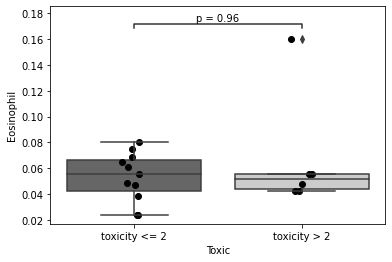

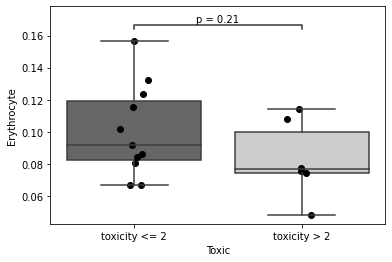

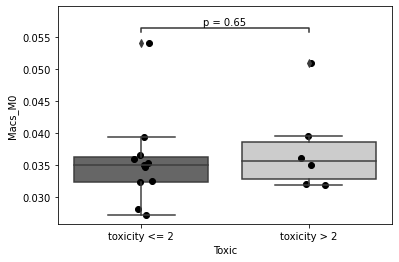

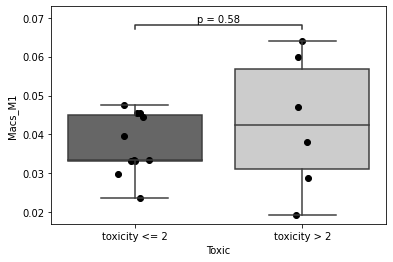

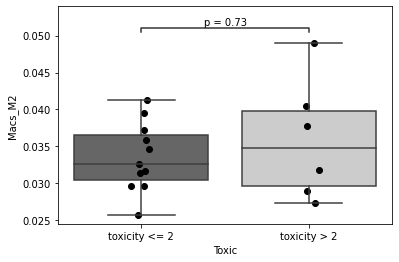

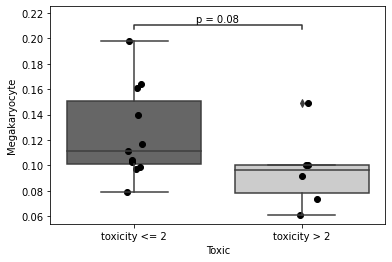

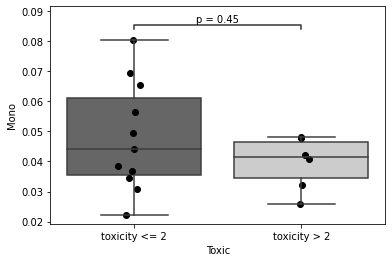

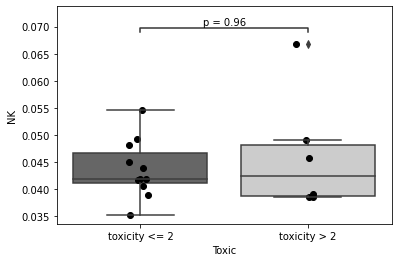

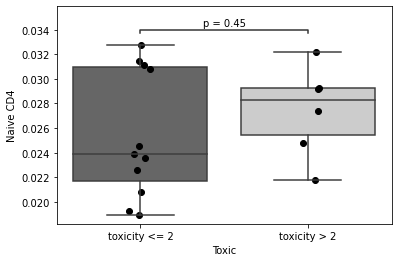

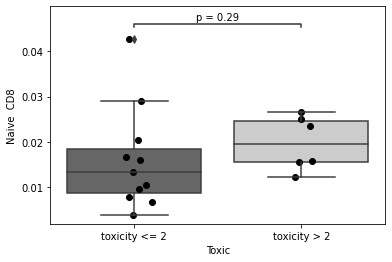

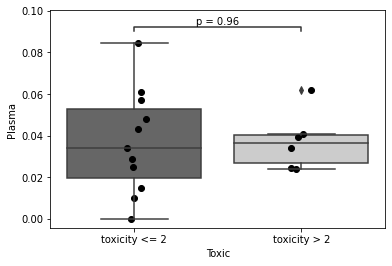

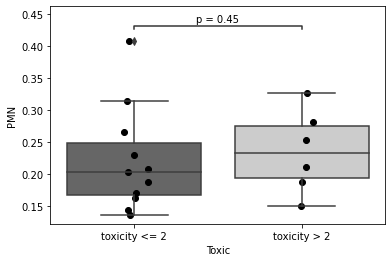

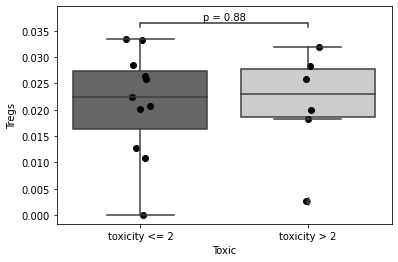

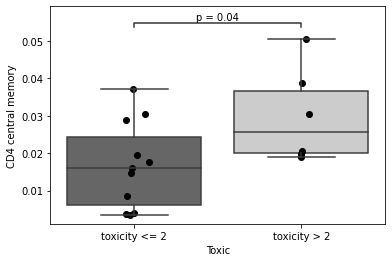

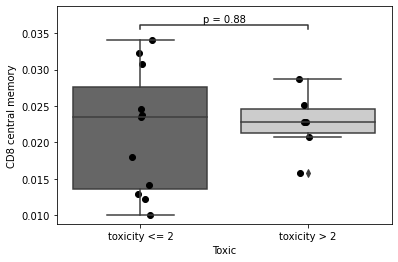

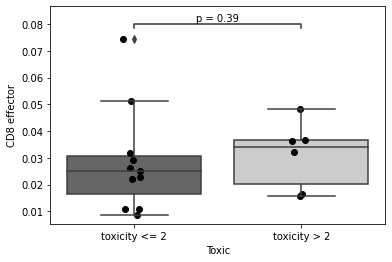

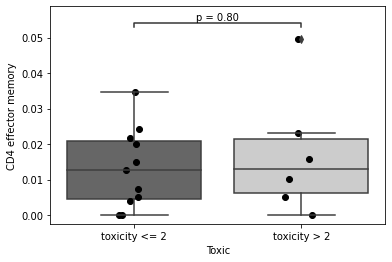

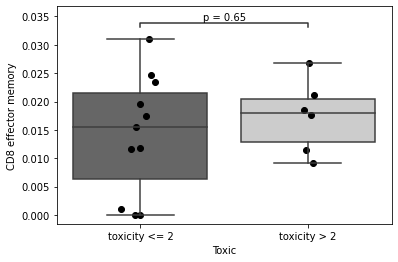

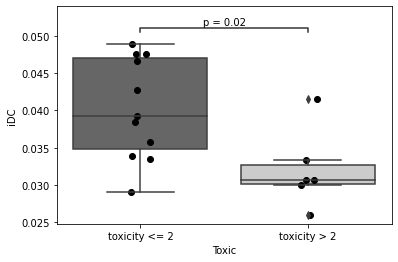

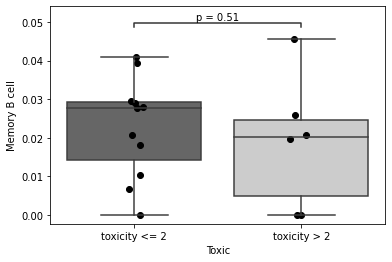

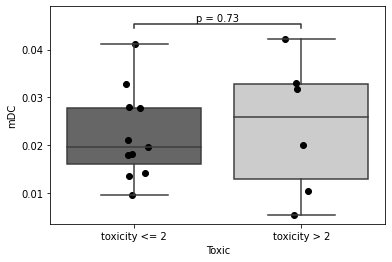

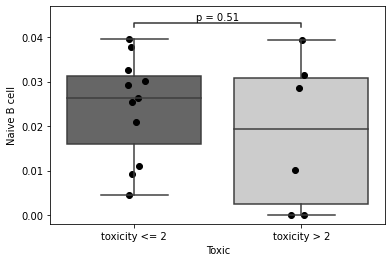

In [5]:
p_vals = {}
for cell in df.columns:
    p_val_list = []
    if cell not in ['Toxicity', 'Toxic']:
        fig, ax = plt.subplots(1, 1)
        sns.boxplot(x='Toxic', y=cell, data=df, ax=ax, palette=[(0.4, 0.4, 0.4), (0.8, 0.8, 0.8)])
        add_stat_annotation(ax, data=df, x='Toxic', y=cell,
                    box_pairs=[(values[0], values[1])],
                    test='Mann-Whitney', text_format='simple', loc='inside', verbose=2)
        for i, toxicity in enumerate(values):
            y = np.array(df[df['Toxic'] == toxicity][cell])
            p_val_list.append(y)
            x = np.random.normal(i, 0.04, size=len(y))
            plt.scatter(x, y, c='k')
        p_vals[cell] = [mannwhitneyu(p_val_list[0], p_val_list[1], alternative='two-sided')[1]]
        print(p_vals[cell])
        plt.savefig(fol + '/' + cell + '.pdf', bbox_inches='tight')

In [6]:
df_pvals = pd.DataFrame.from_dict(p_vals, orient='index', columns=['p-value (MWU)'])
df_pvals.to_csv(file + '_pvals.txt', sep='\t')